# TMDB Movie Analysis: Exploring the Most Popular Movies, Highest Grossing Movies, and More!

## Introduction

How do we know if a certain movie is destined to be a Box Office success, or a Box Office flop?

Is it the **million dollar casts** ("Tom Hanks", "Chris Pratt")? Could it be the **visionary director** ("J.J. Abrams", "James Wan")? What about the **genres** (Action, Adventure, Thriller)?

In this analysis, we set out to analyze TMDB movie dataset to get insights and answer all our burning curiousity. 

The dataset is from [Kaggle: 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata) and contains information about 10,867 movies collected from The Movie Database (TMDb), including popularity, revenue, budget, cast and genres. 

_(This analysis is a case study in the Udacity Data Analyst Nanodegree Program.)_

## Table of Contents

<ul>
<li><a href="#ask questions">Asking Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


***
<a id='ask questions'></a>
## Asking Questions

Based on dataset, we are interested to know:

- Q1: Does having a higher budget results in a higher revenue and profit?
- Q2: Which genres are associated with high popularity?
- Q3: Which director produces the highest revenue movies?
- Q4: Which actor is associated with higher popularity and revenue profit?
- Q5: Which year produced movies with highest grossing revenue?

***

<a id='wrangling'></a>
## Data Wrangling

We will prepare the environment, load and assess dataset. Subsequently, we also clean and process the data for analysis.

### Preparing the Environment

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import CSV
df = pd.read_csv('/Users/katiehuang/Documents/Data Analytics/Udacity Data Analyst Nanodegree/Project 2 - TMDB Movie/tmdb-movies.csv')

### Assess Data

In this step, we view the dataset and get basic information.

In [2]:
# View first 3 rows
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08


In [3]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Handle Duplicates

In [4]:
# Check for duplicates
df.duplicated().sum()

1

As there is only 1 duplicated row, we drop the row.

In [5]:
# Drop row and set inplace to True to reflect changes in dataset
df.drop_duplicates(inplace=True)

### Handle Missing Values

Using percentage to find missing values would give a clearer representation of the missing values in the dataset.

In [6]:
# Find percentage of null values
df.isnull().sum()/len(df)*100

id                       0.000000
imdb_id                  0.092039
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699494
homepage                72.977451
director                 0.404970
tagline                 25.991717
keywords                13.741371
overview                 0.036815
runtime                  0.000000
genres                   0.211689
production_companies     9.479982
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

We will drop homepage, tagline, keywords and other unnecessary fields that we are not analysing.

### Drop Columns

In [7]:
# Drop columns
df.drop(['imdb_id','homepage','tagline','keywords','overview','production_companies','release_date',
         'vote_count','budget_adj','revenue_adj'], axis=1, inplace=True)

In [8]:
# Confirm that colummns are dropped
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015


### Create Calculated Field

In [9]:
# Create a column for profit and profit margin
df['profit'] = df['revenue'] - df['budget']
df['profit_margin'] = df['profit']/df['revenue']*100

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,profit,profit_margin
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,6164.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,5.975012,2001.321859,2.520261e+07,-inf
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,0.935138,12.813260,9.659103e+07,NaN
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000,-4.139124e+08,-inf
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000,0.000000e+00,-618.520453
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000,0.000000e+00,47.321674
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000,9.092453e+06,85.279760
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000,2.544506e+09,100.000000


***

<a id='eda'></a>
## Exploratory Data Analysis

## Q1: Does a higher budget results in higher revenue and profit?

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,profit,profit_margin
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,6164.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,5.975012,2001.321859,2.520261e+07,-inf
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,0.935138,12.813260,9.659103e+07,NaN
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000,-4.139124e+08,-inf
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000,0.000000e+00,-618.520453
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000,0.000000e+00,47.321674
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000,9.092453e+06,85.279760
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000,2.544506e+09,100.000000


We observed something strange here. At least 50% of revenue are 0. And, if you look at profit column, there is a negative profit in the min row and same situation as revenue, half of it are recording $0 profit.

Looking at the new column profit_margin, only 6,164 rows (57%) have profit margins which means the remaining rows have either a $0 in budget or revenue. 

We will create a subset where budget is more than 0.

In [12]:
budget = df.query('budget > 0')
budget.describe()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,id,popularity,budget,revenue,runtime,vote_average,release_year,profit,profit_margin
count,5169.000000,5169.000000,5.169000e+03,5.169000e+03,5169.000000,5169.000000,5169.000000,5.169000e+03,5169.000000
mean,45513.725479,0.992400,3.073958e+07,8.029101e+07,107.096150,6.032308,2001.251112,4.955143e+07,-inf
std,72730.345078,1.329262,3.890441e+07,1.594865e+08,22.810038,0.884125,11.776443,1.351328e+08,NaN
min,5.000000,0.001117,1.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000,-4.139124e+08,-inf
25%,8840.000000,0.347958,6.000000e+06,0.000000e+00,93.000000,5.500000,1996.000000,-6.597680e+06,NaN
50%,13008.000000,0.624024,1.700000e+07,2.100156e+07,103.000000,6.100000,2005.000000,2.507368e+06,16.956397
75%,44943.000000,1.152417,4.000000e+07,8.945676e+07,117.000000,6.600000,2010.000000,5.279686e+07,69.288745
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,8.400000,2015.000000,2.544506e+09,99.999902


This is a better representation to analyse revenue and profit.

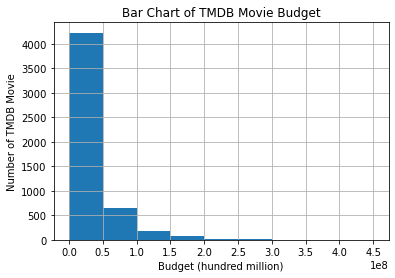

In [46]:
# Budget
x_ticks = np.arange(1.000000e+00,5.000000e+08,5.000000e+07)

budget['budget'].hist(bins=x_ticks)
plt.title("Bar Chart of TMDB Movie Budget")
plt.xlabel("Budget (hundred million)")
plt.xticks(x_ticks)
plt.ylabel("Number of TMDB Movie");

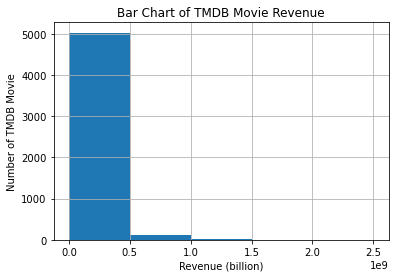

In [14]:
# Revenue
x_ticks = np.arange(0.000000e+00,3.000000e+09,5.000000e+08)

budget['revenue'].hist(bins=x_ticks)
plt.title("Bar Chart of TMDB Movie Revenue")
plt.xlabel("Revenue (billion)")
plt.xticks(x_ticks)
plt.ylabel("Number of TMDB Movie");

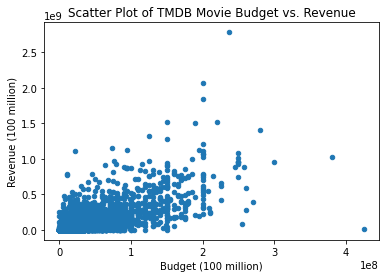

In [15]:
# Budget vs Revenue
budget.plot(y='revenue',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Revenue")
plt.xlabel("Budget (100 million)")
plt.ylabel("Revenue (100 million)");

### In general, movies with a higher budget results in a higher revenue.

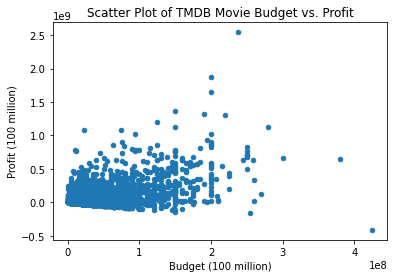

In [16]:
# Budget vs Profit
budget.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (100 million)")
plt.ylabel("Profit (100 million)");

### In general, movies with a higher budget results in a higher profit.

Based on an Investopedia article, [Why Movies Cost So Much To Make](https://www.investopedia.com/financial-edge/0611/why-movies-cost-so-much-to-make.aspx), 

> The average cost to produce a major studio movie has been around USD 65 million. But the production costs don't cover distribution and marketing, which adds another USD 35 million or so, on average, bringing the total cost to produce and market a major movie to right about USD 100 million. 

We will filter for budgets with USD 100 million and more. 

In [17]:
blockbuster = budget.query('budget > 1.000000e+08')
blockbuster.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year,profit,profit_margin
count,282.000000,282.000000,2.820000e+02,2.820000e+02,282.000000,282.000000,282.000000,2.820000e+02,282.000000
mean,46172.187943,3.300546,1.544628e+08,4.778548e+08,123.031915,6.345035,2008.485816,3.233920e+08,-inf
std,62780.785336,3.535419,4.436161e+07,3.509745e+08,33.718360,0.736825,4.961935,3.362143e+08,NaN
min,22.000000,0.157586,1.020000e+08,0.000000e+00,76.000000,4.400000,1994.000000,-4.139124e+08,-inf
25%,2030.000000,1.507585,1.250000e+08,2.453954e+08,102.000000,5.800000,2005.000000,1.089377e+08,44.387952
50%,14515.000000,2.437016,1.500000e+08,3.786594e+08,121.000000,6.350000,2010.000000,2.417142e+08,63.528171
75%,68723.250000,3.964661,1.750000e+08,6.303428e+08,137.000000,6.800000,2013.000000,4.886075e+08,75.959035
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,8.100000,2015.000000,2.544506e+09,91.479435


In [18]:
blockbuster.shape

(282, 13)

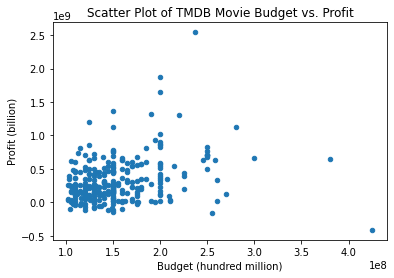

In [19]:
blockbuster.plot(y='profit',x='budget',kind='scatter')

plt.title("Scatter Plot of TMDB Movie Budget vs. Profit")
plt.xlabel("Budget (hundred million)")
plt.ylabel("Profit (billion)");

### We see a lot more outliers when it comes to Blockbuster movies with higher budget, but not necessarily having high profit. 

Let us find out the top 10 movies with highest budget.

In [20]:
# Groupby Movie Title and Budget, Revenue and Profit for Top 10 Movies
blockbuster_grouped = blockbuster.groupby('original_title')[['budget','revenue','profit']].sum().sort_values('budget',ascending=False).iloc[:10,:]
blockbuster_grouped

,budget,revenue,profit
original_title,,,
The Warrior's Way,425000000,11087569,-413912431
Pirates of the Caribbean: On Stranger Tides,380000000,1021683000,641683000
Pirates of the Caribbean: At World's End,300000000,961000000,661000000
Godzilla,290000000,908090363,618090363
Avengers: Age of Ultron,280000000,1405035767,1125035767
Superman Returns,270000000,391081192,121081192
Tangled,260000000,591794936,331794936
John Carter,260000000,284139100,24139100
Spider-Man 3,258000000,890871626,632871626


Not even a billion dollar budget can stop a movie from making losses. "The Warrior's Way" and "The Lone Ranger" are loss-making with the former making a USD 400 million loss. 

***

## Q2: Which genres are associated with high popularity?

Before we dive into the analysis, we must first understand what it means by popularity and how is it calculated?

#### On TMDB website, the popularity metric is calculated based on **Movies**, **TV Shows** and **People** where it measures the number of votes and views, and number of users who marked it as their "favourite" or added into their "watchlist". 

Source: [https://developers.themoviedb.org/3/getting-started/popularity](https://developers.themoviedb.org/3/getting-started/popularity)


In [21]:
df['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

It is interesting to note that 75% of the data's popularity is 0.71 score and we have the other extreme, a score of 32.98 and not a rating of 10 as we would have expected from a generic popularity scheme. 

Why is that so? 

I did some research and found an answer on the TMDB forum where one of the staff, Travis Bell [shed some light](https://www.themoviedb.org/talk/5141d424760ee34da71431b0) on the popularity calculation.

> ### Upper (_referring to the maximum value of the popularity metric_) no, this is the same as before. Lower, 0. It can be anywhere from 0 to essentially infinity.

What he means is that ````the popularity score starts from 0 and runs to infinity. ````

Hmm, that can be tough to measure. Let's get the average popularity and use it as our benchmark.

In [22]:
df['popularity'].mean()

0.6464455549010583

Since the popularity genres for each movies are in a single cell and separated by "|", then we will conduct the splitting first.

In [23]:
df['genres'] = df['genres'].str.split("|") 
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386


In [24]:
genre = df.explode('genres')
genre.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,6.5,2015,1363528810,90.089386
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,6.5,2015,1363528810,90.089386
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,6.5,2015,1363528810,90.089386


In [25]:
genre['genres'].value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

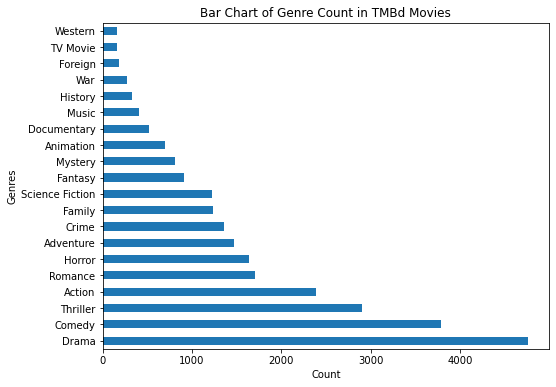

In [26]:
plt.figure(figsize=[8,6])
genre['genres'].value_counts().plot.barh()
plt.title("Bar Chart of Genre Count in TMBd Movies")
plt.ylabel("Genres")
plt.xlabel("Count");

### Highest count of genres are Drama, Comedy and Thriller. Does it mean that they're most popular?

In [27]:
genre_mean = genre.groupby('genres')[['popularity','revenue','profit']].mean().sort_values('popularity', ascending=False)
genre_mean.iloc[:10,:].query("popularity > 0.6464455549010583")

,popularity,revenue,profit
genres,,,
Adventure,1.154259,1.131379e+08,7.559417e+07
Science Fiction,1.001548,7.014056e+07,4.516788e+07
Fantasy,0.992840,9.631366e+07,6.370107e+07
Action,0.926274,7.279473e+07,4.506691e+07
Animation,0.852182,7.525606e+07,5.209628e+07
Family,0.786668,7.243318e+07,4.907384e+07
Crime,0.744930,4.236866e+07,2.470486e+07
Thriller,0.741563,4.172842e+07,2.452072e+07
War,0.727683,4.760518e+07,2.671330e+07


Doesn't seem like it. Here, we see completely different set of popular genres.

### Adventure, Science Fiction and Fantasy are the most popular genres. 

***

## Q3: Which director produces the highest revenue movies?


In [28]:
df['director'].value_counts()

Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: director, Length: 5067, dtype: int64

In [29]:
df['director'] = df['director'].str.split("|") 
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386


In [30]:
directors_df = df.explode('director')
directors_df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386


In [31]:
directors_df['director'].value_counts()

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Steven Soderbergh    23
                     ..
Mike Maguire          1
Tom Kuntz             1
John Simpson          1
Simon Hunter          1
Harold P. Warren      1
Name: director, Length: 5362, dtype: int64

In [32]:
directors_df.groupby('director')[['revenue','profit']].mean().sort_values('revenue', ascending=False).head(5)

,revenue,profit
director,,
Pierre Coffin,8.903356e+08,8.173356e+08
David Yates,8.308591e+08,6.758591e+08
Colin Trevorrow,7.587683e+08,6.833933e+08
Robert Stromberg,7.584104e+08,5.784104e+08
Lee Unkrich,7.439073e+08,6.191573e+08


In [33]:
directors_df.groupby('director')[['revenue','profit']].mean().sort_values('profit', ascending=False).head(5)

,revenue,profit
director,,
Pierre Coffin,8.903356e+08,8.173356e+08
Colin Trevorrow,7.587683e+08,6.833933e+08
David Yates,8.308591e+08,6.758591e+08
Lee Unkrich,7.439073e+08,6.191573e+08
Robert Stromberg,7.584104e+08,5.784104e+08


### On average, the director producing the movie with the highest revenue and profit is Pierre Coffin. 

Let us find out what are the movies produced by Pierre Coffin.

In [34]:
directors_df.query('director == "Pierre Coffin"').sort_values('profit', ascending=False).head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Pierre Coffin,91,"[Family, Animation, Adventure, Comedy]",6.5,2015,1082730962,93.602661
5434,93456,3.928789,76000000,970761885,Despicable Me 2,Steve Carell|Kristen Wiig|Benjamin Bratt|Miran...,Pierre Coffin,98,"[Animation, Comedy, Family]",7.0,2013,894761885,92.171098
1924,20352,3.791881,69000000,543513985,Despicable Me,Steve Carell|Jason Segel|Russell Brand|Julie A...,Pierre Coffin,95,"[Action, Animation, Family]",7.1,2010,474513985,87.304834


### Not surprisingly, it's the Despicable Me movie series which is well-loved by both kids and adults.

***

## Q4: Which actor is associated with higher popularity, revenue and profit?

In [35]:
df['cast'].value_counts()

Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
George Carlin                                                                     3
Pierre Coffin                                                                     3
                                                                                 ..
Ray Stevenson|Vincent D'Onofrio|Val Kilmer|Christopher Walken|Linda Cardellini    1
Freida Pinto|Riz Ahmed|Roshan Seth|Kalki Koechlin|Anurag Kashyap                  1
William Hurt|Paul Giamatti|James Woods|Billy Crudup|Topher Grace                  1
Dennis Quaid|Tony Oller|Aimee Teegarden|Stephen Lunsford|Devon Werkheiser         1
Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson          1
Name: cast, Length: 10719, dtype: int64

In [36]:
df['cast'].describe()

count          10789
unique         10719
top       Louis C.K.
freq               6
Name: cast, dtype: object

In [37]:
df['cast'] = df['cast'].astype(str)
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386


In [38]:
df['cast'] = df['cast'].str.split("|")
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386


In [39]:
cast_df = df.explode('cast')
cast_df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",6.5,2015,1363528810,90.089386


In [40]:
cast_df['cast'].value_counts()

nan                      76
Robert De Niro           72
Samuel L. Jackson        71
Bruce Willis             62
Nicolas Cage             61
                         ..
Aran Bell                 1
Rebecca Houseknecht       1
Joan Sebastian Zamora     1
Miko Fogarty              1
Stephanie Nielson         1
Name: cast, Length: 19027, dtype: int64

In [41]:
cast_df.groupby('cast')[['popularity','revenue']].sum().sort_values('revenue',ascending=False).head(5)

,popularity,revenue
cast,,
Harrison Ford,80.138138,8922840695
Tom Cruise,59.140741,8812436186
Tom Hanks,66.540270,8418142612
Emma Watson,53.598217,8176916698
Ian McKellen,61.067864,8115046043


In [42]:
cast_df.query('cast == "Harrison Ford"').sort_values('revenue',ascending=False).head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,[J.J. Abrams],136,"[Action, Adventure, Science Fiction, Fantasy]",7.5,2015,1868178225,90.329654


In [43]:
cast_df.query('cast == "Tom Cruise"').sort_values('revenue',ascending=False).head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
3382,56292,2.95274,145000000,694713380,Mission: Impossible - Ghost Protocol,Tom Cruise,[Brad Bird],133,"[Action, Thriller, Adventure]",6.7,2011,549713380,79.128083


In [44]:
cast_df.query('cast == "Tom Hanks"').sort_values('revenue',ascending=False).head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
1930,10193,2.711136,200000000,1063171911,Toy Story 3,Tom Hanks,[Lee Unkrich],103,"[Animation, Family, Comedy]",7.5,2010,863171911,81.188367


### Actors associated with higher revenue and profit are Harrison Ford, Tom Hanks and Tom Cruise.

***

## Q5: Which year produced movies with highest grossing revenue?

In [45]:
df.sort_values('revenue',ascending=False).head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year,profit,profit_margin
1386,19995,9.432768,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],162,"[Action, Adventure, Fantasy, Science Fiction]",7.1,2009,2544505847,91.479435


### Avatar produced in 2009 has the highest grossing revenue.

***

<a id='conclusions'></a>
## Conclusions

Let us revisit the questions and summarize our conclusion.

#### Q1: Does having a higher budget results in a higher revenue and profit?

> ### In most cases, a higher budget does results in higher revenue and profit. However, the analysis shows that there are outlier where a high budget results in losses.

#### Q2: Which genres are associated with high popularity?

> ### Adventure, Science Fiction and Fantasy are the most popular genres.

#### Q3: Which director produces the highest revenue movies?

> ### Pierre Coffin is the director who produced the highest revenue movie with the Despicable Me movies.

#### Q4: Which actor is associated with higher popularity, revenue and profit?

> ### Actors associated with higher revenue and profit are Harrison Ford, Tom Hanks and Tom Cruise.

#### Q5: Which year produced movies with highest grossing revenue?

> ### Avatar produced in 2009 has the highest grossing revenue at USD 2.7 billion.

In conclusion, the factors contributing to a Box Office success is not only having a billion dollar budget, the  right genre, director, and star-studded casts also contributed to the revenue.

### Limitations of Dataset
1. 43% of dataset have USD 0 budget, hence the profit analysis is representative of the remaining 57% of dataset only.
2. The revenue and budget were not denominated in currency, so it’s unsure whether they are in USD, or another currency.
3. There were multiple genres in each movie, hence we split the genres such that each genre is allocated to 1 row.

### Reference
1. https://pandas.pydata.org/docs/user_guide/index.html
2. https://www.investopedia.com/financial-edge/0611/why-movies-cost-so-much-to-make.aspx
3. https://developers.themoviedb.org/3/getting-started/popularity


***